In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df1=pd.read_csv("/content/sample_data/COVID Fake News Data (3).csv")
df2=df1

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Data Preprocessing**

In [4]:
#Tokenization
def identify_tokens(row):
    review = row['headlines']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    #token_words = [w for w in tokens if w.isalpha()]
    return tokens

In [5]:
#Stemming
stemming = PorterStemmer()
def stem_list(row):
    my_list = row['headlines']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

In [6]:
#Lemmatization 
lemmatizer = WordNetLemmatizer()
def lem_list(row):
    my_list = row['headlines']
    lemmatized_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (lemmatized_list)

In [7]:
#Removing stop words
stops = set(stopwords.words("english"))                  
def remove_stops(row):
    my_list = row['headlines']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

In [8]:
#Rejoining Tweets
def rejoin_words(row):
    my_list = row['headlines']
    joined_words = ( " ".join(my_list))
    return joined_words

In [9]:
df2["headlines"]=df2["headlines"].str.lower()
df2["headlines"]=df2["headlines"].str.replace("[^a-zA-Z]"," ") #Removing Punctuations
df2["headlines"]=df2["headlines"].str.encode('ascii', 'ignore').str.decode('ascii') #Removing Unicodes
df2["headlines"]=df2["headlines"].str.replace('\d+','')#Removing numbers
df2['headlines']=df2.apply(identify_tokens, axis=1)
df2['headlines']=df2.apply(stem_list, axis=1)
df2["headlines"]=df2.apply(lem_list, axis=1)
df2['headlines']=df2.apply(remove_stops, axis=1)
df2['headlines']=df2.apply(rejoin_words, axis=1)


## **Data** **Visualization**

[Text(0, 0, 'False'), Text(0, 0, 'True')]

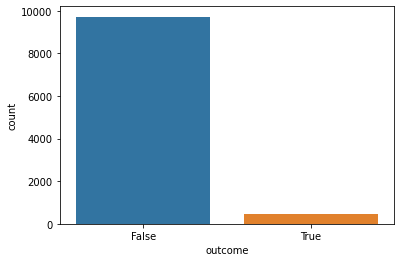

In [10]:
ax = sns.countplot(x="outcome", data=df2)
ax.set_xticklabels(["False","True"])

In [11]:
#Words Analysis

In [12]:
words=[]
word_list=[]
for a in df2["headlines"]:
  tokens = nltk.word_tokenize(a)
  words.append(tokens)

for b in words:
    word_list += b
word_cloud = " ".join(word_list)

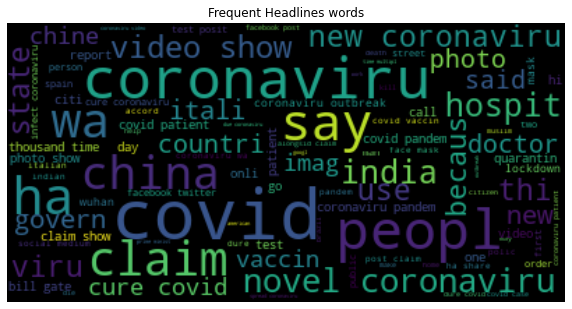

In [91]:
word= WordCloud(background_color="black",max_font_size=50, max_words=100).generate(word_cloud)
plt.figure(figsize = (10,10))
plt.imshow(word, interpolation='bilinear')
plt.axis("off")
plt.title("Frequent Headlines words")
plt.show()

In [14]:
#Positive Words & Negative Words Analysis
def words(data_frame,b):
  words=[]
  words_list=[]
  for a in data_frame[data_frame['outcome']==b]["headlines"]:
    tokens = nltk.word_tokenize(a)
    words.append(tokens) 
  for b in words:
    words_list += b
  word_cloud = " ".join(words_list)
  return word_cloud

In [15]:
#Words Visualization
def viz(a):
  word= WordCloud(background_color="black",max_font_size=50, max_words=100).generate(a)
  return word

In [16]:
#False Headlines words Visualization
word_clo=words(df2,0)
False_viz=viz(word_clo)

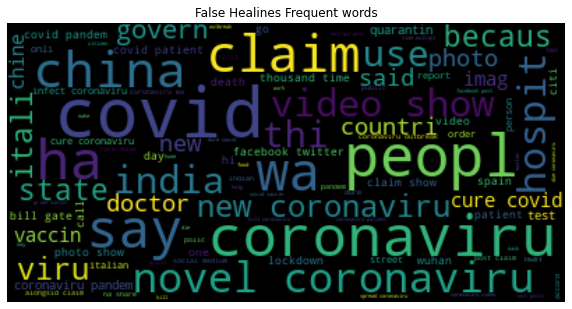

In [89]:
plt.figure(figsize = (10,10))
plt.imshow(False_viz, interpolation='bilinear')
plt.axis("off")
plt.title("False Healines Frequent words")
plt.show()

In [18]:
#True Headlines words Visualization
word_cloud_true=words(df2,1)
True_viz=viz(word_cloud_true)

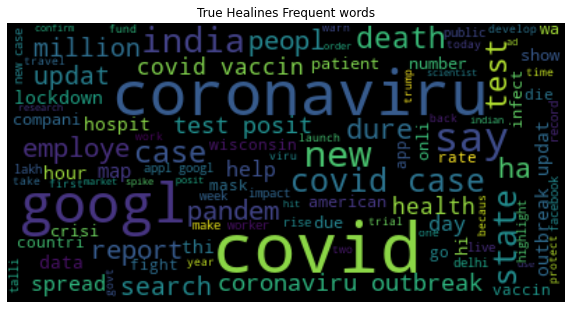

In [90]:
plt.figure(figsize = (10,10))
plt.imshow(True_viz, interpolation='bilinear')
plt.axis("off")
plt.title("True Healines Frequent words")
plt.show()

In [20]:
#Top 20 frequency words in corpus

In [21]:
Top_20_freq_words=pd.Series(word_list).value_counts()

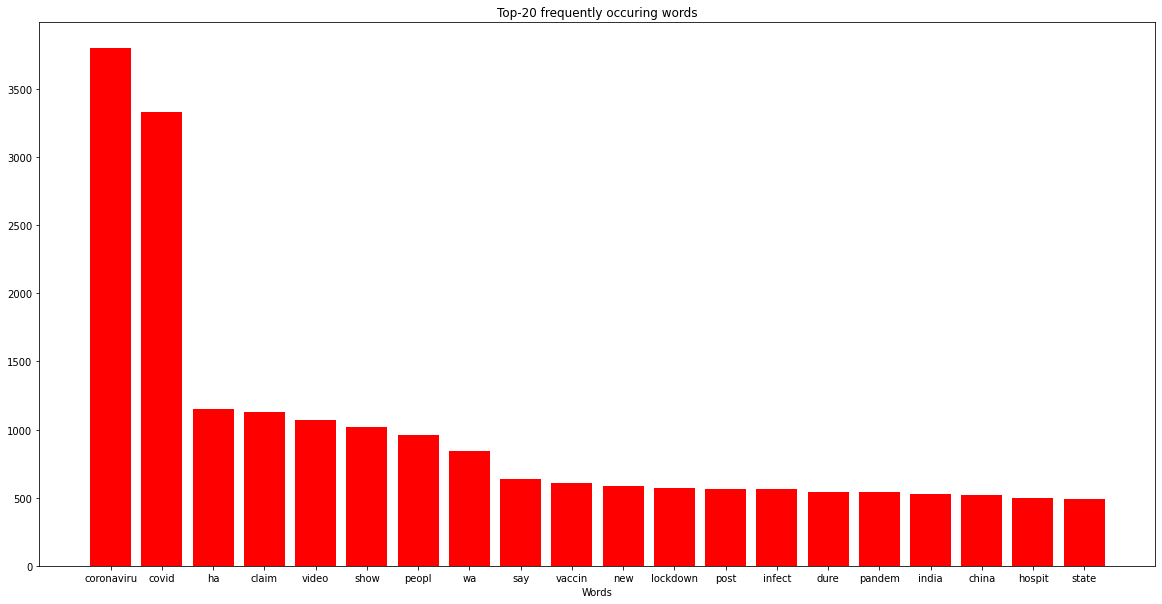

In [87]:
plt.figure(figsize = (20,10))
plt.bar(Top_20_freq_words.index[0:20],Top_20_freq_words.values[0:20],color="red")
plt.title('Top-20 frequently occuring words')
plt.xlabel('Words')
plt.show()

In [40]:
#F
Each_sentence_word_count=[]
for a in df2['headlines']:
  Each_sentence_word_count.append(len(a))


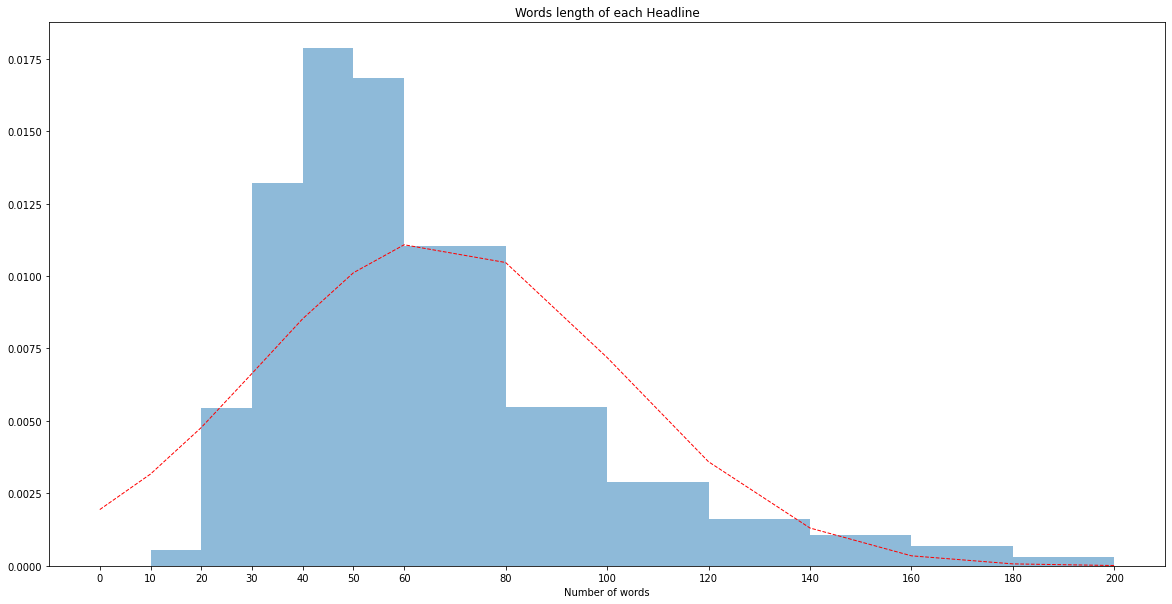

In [86]:
from scipy.stats import norm
num_bins =[0, 10, 20, 30, 40, 50, 60, 80, 100,120,140,160,180,200]
plt.subplots(figsize=(20,10))
n, bins, patches=plt.hist(Each_sentence_word_count,num_bins,density=True,alpha=0.5)
y = norm.pdf(bins,np.mean(Each_sentence_word_count), np.std(Each_sentence_word_count))
plt.plot(bins, y, 'r--', linewidth=1)
plt.title('Words length of each Headline')
plt.xticks(num_bins)
plt.xlabel('Number of words')
plt.show()


In [27]:
#Creating Bag of words model

**Creating Bag of words model**

In [ ]:
from sklearn import model_selection, naive_bayes
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df2['headlines'],df2['outcome'],test_size=0.3) #30 percent test 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2),max_features=1000)
Tfidf_vect.fit(df2['headlines'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)


In [ ]:
Train_X_Tfidf

<7140x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 60517 stored elements in Compressed Sparse Row format>

In [ ]:
Test_X_Tfidf = Tfidf_vect.transform(Test_X).toarray()

In [ ]:
Test_X_Tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])